# RUN THIS AFTER CONCATENATING BERT OUTPUT TO CSV'S

In [1]:
import numpy as np
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import datetime
from tqdm import tqdm

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 500)
pd.options.display.float_format = '{:.2f}'.format

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97.5% !important; }</style>"))

# AGGREGATING USER BEHAVIOUR BY DATE

In [3]:
MERGED_TWEET_CHUNK_READ_PATH = r"/scratch/st-tlemieux-1/lfrymire/BERT-input/FINAL-INPUTS/ALL-TWEETS/COV-CT-Tweets/" #this should be a folder containing three folders - one for each type of CT tweet (make sure it ends in a slash)

AGGREGATED_TWEET_CHUNK_SAVE_PATH = r"/scratch/st-tlemieux-1/lfrymire/BERT-OUTPUT/"

In [4]:
def get_files_in_folder(folder):
    
    return [f for f in listdir(folder) if isfile(join(folder, f))]

In [5]:
chunk_paths = get_files_in_folder(MERGED_TWEET_CHUNK_READ_PATH)

In [6]:
chunk_paths = [x for x in chunk_paths if not 'TEST' in x and len(x) < 25]

In [7]:
cols_to_use = ['sentence1', 'user_id', 'label',
               'CT Tweet (Dummy)','NON-COVID CT Tweet (Dummy)', 'date', 'retweet']

bool_cols = ['label', 'CT Tweet (Dummy)','NON-COVID CT Tweet (Dummy)', 'retweet']
int_cols = ['user_ID']
# str_cols = ['Cleaned Tweet']

# obj_cols = ['language']

bool_cols_dict = {col:np.bool_ for col in bool_cols}
int_cols_dict = {col:np.int0 for col in int_cols}
# str_cols_dict = {col:str for col in str_cols}
# obj_cols_dict = {col:str for col in obj_cols}

# datatypes = {**bool_cols_dict, **str_cols_dict, **obj_cols_dict}
# datatypes = {**bool_cols_dict, **obj_cols_dict}
datatypes = {**bool_cols_dict, **int_cols_dict}

In [8]:
# def get_date(s):
#     return datetime.date(int(s[0:4]), int(s[5:7]), int(s[8:10]))

In [9]:
agg_dict = {'COVID-SPECIFIC CT Tweet (Dummy)':['mean', 'sum'],
            'CT Tweet (Dummy)':['mean','sum'],
            'NON-COVID CT Tweet (Dummy)':['mean','sum'],
            'retweet':['mean', 'size'],
            'Non-CT Tweet':['mean','sum']}

In [10]:
# def get_missing_dates(user):
#     missing_dates = np.setdiff1d(all_dates, collapsed_chunk.loc[user, 'date'].unique())    
#     return missing_dates

# def fill_missing_dates(collapsed_chunk):
    
#     users_to_delete = []
    
#     missing_dates_df_dict = {col:[] for col in collapsed_chunk.reset_index().columns}
#     non_date_user_cols = [key for key in missing_dates_df_dict.keys() if not key in ('date', 'user_id')]

#     print(missing_dates_df_dict)
    
#     for i, user in enumerate(collapsed_chunk.index.unique()):
# #         print(i, user)
#         # find all missing dates
#         try:
#             missing_dates = get_missing_dates(user)
            
#             # append np.arrays of missing values (dates, user_id, and then zeros) to dictionary
#             missing_dates_df_dict['date'].append(missing_dates)
#             missing_dates_df_dict['user_id'].append(np.array([user]*len(missing_dates)))
#             for col in non_date_user_cols:
#                 missing_dates_df_dict[col].append(np.zeros(len(missing_dates)))
#         except:
#             users_to_delete.append(user)
#             continue

#     # flatten list of np arrays
#     for col in missing_dates_df_dict:
#         print(col)
#         print(missing_dates_df_dict[col])
#         missing_dates_df_dict[col] = np.concatenate(missing_dates_df_dict[col]).ravel()

#     # convert to dataframe    
#     missing_dates_df = pd.DataFrame(missing_dates_df_dict)
    
#     collapsed_chunk.drop(users_to_delete, inplace=True)
    
#     collapsed_chunk.reset_index(inplace=True)
    
#     return collapsed_chunk.append(missing_dates_df)

In [11]:
rename_dict = {('COVID-SPECIFIC CT Tweet (Dummy)', 'mean'):'COVID CT Tweet - MEAN',
                                ('COVID-SPECIFIC CT Tweet (Dummy)', 'sum'):'COVID CT Tweet - COUNT',
                                ('CT Tweet (Dummy)', 'mean'):'CT Tweet - MEAN',
                                ('CT Tweet (Dummy)', 'sum'):'CT Tweet - COUNT',
                                ('NON-COVID CT Tweet (Dummy)', 'mean'): 'NON-COVID CT Tweet - MEAN',
                                ('NON-COVID CT Tweet (Dummy)', 'sum'):'NON-COVID CT Tweet - COUNT',
                                ('retweet', 'mean'):'Retweets - MEAN',
                                ('retweet', 'size'): 'Tweet Count',
                                ('Non-CT Tweet', 'mean'):'Non-CT Tweet - MEAN',
                                ('Non-CT Tweet', 'sum'):'Non-CT Tweet - COUNT'}

# Bring in BERT Data

In [12]:
# bert_cols_to_use = [col for col in cols_to_use if not col=='sentence1'] + ['prediction', 'date']

# bert = pd.read_csv(r"/scratch/st-tlemieux-1/fresh-install/CORE-FINAL-PREDICTIONS/merged.csv", usecols=bert_cols_to_use, dtype=datatypes)#, parse_dates=['date'], date_parser=get_date)

# bert.rename(columns={'label':'COVID-SPECIFIC CT Tweet (Dummy)', 'prediction':'BERT COVID CT Tweet'}, inplace=True)

# bert['BERT COVID CT Tweet'] = bert[['BERT COVID CT Tweet']].applymap({"CT":1, 'Not CT':0}.get)

# bert_agg_dict = agg_dict
# bert_agg_dict['BERT COVID CT Tweet'] = ['mean', 'sum']
# bert_agg_dict['BERT Non-CT Tweet'] = ['mean', 'sum']

# bert_rename_dict = rename_dict
# bert_rename_dict[('BERT COVID CT Tweet', 'mean')] = 'BERT COVID CT Tweet - MEAN'
# bert_rename_dict[('BERT COVID CT Tweet', 'sum')] = 'BERT COVID CT Tweet - COUNT'

# bert_rename_dict[('BERT Non-CT Tweet', 'mean')] = 'BERT Non-CT Tweet - MEAN'
# bert_rename_dict[('BERT Non-CT Tweet', 'sum')] = 'BERT Non-CT Tweet - COUNT'

In [13]:
# def get_missing_dates(user, df):
#     missing_dates = np.setdiff1d(all_dates, df.loc[user, 'date'].unique())    
#     return missing_dates

# def fill_missing_dates(collapsed_chunk):
    
#     users_to_delete = []
    
#     missing_dates_df_dict = {col:[] for col in collapsed_chunk.reset_index().columns}
#     non_date_user_cols = [key for key in missing_dates_df_dict.keys() if not key in ('date', 'user_id')]

#     for i, user in enumerate(collapsed_chunk.index.unique()):
#         # find all missing dates
#         try:
#             missing_dates = get_missing_dates(user, collapsed_chunk)

#             # append np.arrays of missing values (dates, user_id, and then zeros) to dictionary
#             missing_dates_df_dict['date'].append(missing_dates)
#             missing_dates_df_dict['user_id'].append(np.array([user]*len(missing_dates)))
#             for col in non_date_user_cols:
#                 missing_dates_df_dict[col].append(np.zeros(len(missing_dates)))
#         except:
#             users_to_delete.append(user)
#             continue

#     # flatten list of np arrays
#     for col in missing_dates_df_dict:
#         missing_dates_df_dict[col] = np.concatenate(missing_dates_df_dict[col]).ravel()

#     # convert to dataframe    
#     missing_dates_df = pd.DataFrame(missing_dates_df_dict)
    
#     collapsed_chunk.drop(users_to_delete, inplace=True)
    
#     collapsed_chunk.reset_index(inplace=True)
    
#     return collapsed_chunk.append(missing_dates_df)

In [14]:
# for time_period in ('M', 'W'):
#     print(time_period)
#     # create "Non-CT Tweet" bool col
#     bert['Non-CT Tweet'] = 1 - (bert[['COVID-SPECIFIC CT Tweet (Dummy)', 'CT Tweet (Dummy)', 'NON-COVID CT Tweet (Dummy)']].sum(axis=1) > 0)
#     bert['BERT Non-CT Tweet'] = 1 - (bert[['BERT COVID CT Tweet', 'CT Tweet (Dummy)', 'NON-COVID CT Tweet (Dummy)']].sum(axis=1) > 0)
    

#     # MIGHT NEED 'user_id' TO BE AN INDEX TOO
#     collapsed_bert = bert.set_index('date').groupby([pd.Grouper(freq=f'1{time_period}'), 'user_id']).agg(bert_agg_dict)

#     collapsed_bert.columns = collapsed_bert.columns.to_flat_index()        

#     collapsed_bert.rename(columns=bert_rename_dict, inplace=True)
#     collapsed_bert.reset_index(inplace=True)
#     collapsed_bert.set_index('user_id', inplace=True)
#     collapsed_bert.sort_index(inplace=True)
    
#     collapsed_bert['date'] = collapsed_bert['date'].dt.strftime('%Y-%m-%d')
    
#     all_dates = collapsed_bert['date'].unique()

#     collapsed_bert = fill_missing_dates(collapsed_bert)
#     # UNCOMMENT WHEN READY
#     collapsed_bert.to_csv(fr"/scratch/st-tlemieux-1/lfrymire/FINAL-BERT-AGGREGATIONS/BERT-AGG-BY-{time_period}.csv")

In [15]:
monthly_non_located_user_behaviour_df = pd.read_csv(r"/scratch/st-tlemieux-1/lfrymire/FINAL-BERT-AGGREGATIONS/BERT-AGG-BY-M.csv")

weekly_non_located_user_behaviour_df = pd.read_csv(r"/scratch/st-tlemieux-1/lfrymire/FINAL-BERT-AGGREGATIONS/BERT-AGG-BY-W.csv")

## MERGE ALL COLLAPSED USERS' BEHAVIOUR CHUNKS

In [16]:
# month_chunk_dfs = [pd.read_csv(fr"{AGGREGATED_TWEET_CHUNK_SAVE_PATH}Chunk-{i}-AGG-BY-M - NO BERT.csv") for i, chunk_path in enumerate(chunk_paths)]
# monthly_non_located_user_behaviour_df = pd.concat(month_chunk_dfs)

# week_chunk_dfs = [pd.read_csv(fr"{AGGREGATED_TWEET_CHUNK_SAVE_PATH}Chunk-{i}-AGG-BY-W - NO BERT.csv") for i, chunk_path in enumerate(chunk_paths)]
# weekly_non_located_user_behaviour_df = pd.concat(week_chunk_dfs)


# del month_chunk_dfs
# del week_chunk_dfs

# MERGING USER BEHAVIOUR TO GEOLOCATED USERS

In [17]:
located_users = pd.read_csv(r"/arc/project/st-tlemieux-1/data/FINAL-CLEANED-GEOLOCATED-USERS.csv")

In [18]:
monthly_final_CT_df = located_users.merge(monthly_non_located_user_behaviour_df,
                   how='inner',
                   left_on='ID',
                   right_on='user_id')

weekly_final_CT_df = located_users.merge(weekly_non_located_user_behaviour_df,
                   how='inner',
                   left_on='ID',
                   right_on='user_id')

In [19]:
monthly_final_CT_df['BERT CT Tweet - COUNT'] = (monthly_final_CT_df[['BERT COVID CT Tweet - COUNT', 'NON-COVID CT Tweet - COUNT']].sum(axis=1))
weekly_final_CT_df['BERT CT Tweet - COUNT'] = (weekly_final_CT_df[['BERT COVID CT Tweet - COUNT', 'NON-COVID CT Tweet - COUNT']].sum(axis=1))

### NOW SAVE TO CSV AND WE'RE DONE HERE!


In [20]:
FINAL_BEHAVIOUR_SAVE_PATH_ROOT = "/scratch/st-tlemieux-1/lfrymire/FINAL-CT-BEHAVIOUR-OUTPUT/"

In [21]:
del monthly_final_CT_df['Unnamed: 0']
del weekly_final_CT_df['Unnamed: 0']

In [22]:
# monthly_final_CT_df.to_csv(f"{FINAL_BEHAVIOUR_SAVE_PATH_ROOT}Monthly Behaviour - NO BERT.csv", index=False)

# weekly_final_CT_df.to_csv(f"{FINAL_BEHAVIOUR_SAVE_PATH_ROOT}Weekly Behaviour - NO BERT.csv", index=False)

# Create New Rows etc.

In [23]:
del weekly_non_located_user_behaviour_df
del monthly_non_located_user_behaviour_df

In [24]:
# monthly_final_CT_df['date'] = monthly_final_CT_df['date'].apply(pd.to_datetime)
# weekly_final_CT_df['date'] = weekly_final_CT_df['date'].apply(pd.to_datetime)

# Remove all users with less than 3 ct tweets

In [25]:
print(len(monthly_final_CT_df['user_id'].unique()))
print(len(weekly_final_CT_df['user_id'].unique()))

13451
13454


In [26]:
month_ct_filter_df = monthly_final_CT_df.groupby('user_id').agg({'COVID CT Tweet - COUNT':'sum'})
month_users_to_drop = month_ct_filter_df[month_ct_filter_df['COVID CT Tweet - COUNT'] <= 2]

week_ct_filter_df = weekly_final_CT_df.groupby('user_id').agg({'COVID CT Tweet - COUNT':'sum'})
week_users_to_drop = week_ct_filter_df[week_ct_filter_df['COVID CT Tweet - COUNT'] <= 2]

monthly_final_CT_df.set_index('user_id', inplace=True)
weekly_final_CT_df.set_index('user_id', inplace=True)

In [27]:
monthly_final_CT_df.drop(month_users_to_drop.index.values, inplace=True)
weekly_final_CT_df.drop(week_users_to_drop.index.values, inplace=True)

In [28]:
print(len(monthly_final_CT_df.index.unique()))
print(len(weekly_final_CT_df.index.unique()))

13428
13431


In [29]:
#save users to lookup as a .csv

# users_to_BERT = np.union1d(monthly_final_CT_df.index.unique(), weekly_final_CT_df.index.unique())

# users_to_BERT = np.array([x for x in users_to_BERT if not np.isnan(x)])

# users_to_BERT_df = pd.DataFrame({'users':users_to_BERT})

# users_to_BERT_df.to_csv(r"/scratch/st-tlemieux-1/lfrymire/BERT-input/final-BERT-subset/Final-List-of-Bert-Users.csv", index=False)

# REMOVE ALL INCONSISTENT USERS

In [30]:
monthly_final_CT_df.reset_index(inplace=True)
weekly_final_CT_df.reset_index(inplace=True)

monthly_final_CT_df.set_index('user_id', inplace=True)
weekly_final_CT_df.set_index('user_id', inplace=True)


monthly_INconsistent_users = []
later_monthly_final_CT_df = monthly_final_CT_df[monthly_final_CT_df['date'].str.contains('2019').fillna(False)]

In [31]:
num_months = len(later_monthly_final_CT_df.loc[120128474.00])

for user in tqdm(later_monthly_final_CT_df.index.unique()):
    if np.count_nonzero(later_monthly_final_CT_df.loc[user, 'Tweet Count']) < num_months * .75:        
        monthly_INconsistent_users.append(user)

100%|██████████| 13428/13428 [00:05<00:00, 2458.66it/s]


In [32]:
len(monthly_INconsistent_users)

3145

In [33]:
monthly_final_CT_df.drop(monthly_INconsistent_users, inplace=True)
weekly_final_CT_df.drop(monthly_INconsistent_users, inplace=True)

In [34]:
len(monthly_final_CT_df.index.unique())

10283

## Create "Tweeted after this date" field

In [35]:
# monthly_final_CT_df.reset_index(inplace=True)
# weekly_final_CT_df.reset_index(inplace=True)

In [36]:
# monthly_final_CT_df.set_index('date', inplace=True)
# weekly_final_CT_df.set_index('date', inplace=True)

In [37]:
def create_tweeted_after_this_date(df, time_period):
    try:
        df.reset_index(inplace=True)
        df.set_index('user_id', inplace=True)
    except:
        df.set_index('user_id', inplace=True)
        
    date_range = np.array([x for x in df['date'].unique()[::-1] if not x=='NaT' and not pd.isnull(x)])

    # df.reset_index(inplace=True)
    # df.set_index(['user_id'], inplace=True)
    df.sort_index(inplace=True)

    next_3_months_anything = []
    next_3_months_CT = []
    next_3_months_COVID_CT = []
    next_3_months_BERT_COVID_CT = []

    next_13_weeks_anything = []
    next_13_weeks_CT = []
    next_13_weeks_COVID_CT = []
    next_13_weeks_BERT_COVID_CT = []

    next_6_months_anything = []
    next_6_months_CT = []
    next_6_months_COVID_CT = []
    next_6_months_BERT_COVID_CT = []

    next_26_weeks_anything = []
    next_26_weeks_CT = []
    next_26_weeks_COVID_CT = []
    next_26_weeks_BERT_COVID_CT = []

    if time_period == 'M':            
        for user in tqdm(df.index.unique()):
            next_3_months_anything.append(df.loc[user, 'Tweet Count'].shift(3).rolling(3, min_periods=0).sum() > 0)
            next_3_months_CT.append(df.loc[user, 'CT Tweet - COUNT'].shift(3).rolling(3, min_periods=0).sum() > 0)
            next_3_months_COVID_CT.append(df.loc[user, 'COVID CT Tweet - COUNT'].shift(3).rolling(3, min_periods=0).sum() > 0)
            next_3_months_BERT_COVID_CT.append(df.loc[user, 'BERT COVID CT Tweet - COUNT'].shift(3).rolling(3, min_periods=0).sum() > 0)
            
            next_6_months_anything.append(df.loc[user, 'Tweet Count'].shift(6).rolling(6, min_periods=0).sum() > 0)
            next_6_months_CT.append(df.loc[user, 'CT Tweet - COUNT'].shift(6).rolling(6, min_periods=0).sum() > 0)
            next_6_months_COVID_CT.append(df.loc[user, 'COVID CT Tweet - COUNT'].shift(6).rolling(6, min_periods=0).sum() > 0)
            next_6_months_BERT_COVID_CT.append(df.loc[user, 'BERT COVID CT Tweet - COUNT'].shift(6).rolling(6, min_periods=0).sum() > 0)

        df['Tweet 3 Months After This'] = np.concatenate(next_3_months_anything).ravel().astype(int)
        df['CT Tweet 3 Months After This'] = np.concatenate(next_3_months_CT).ravel().astype(int)
        df['COVID CT Tweet 3 Months After This'] = np.concatenate(next_3_months_COVID_CT).ravel().astype(int)
        df['BERT COVID CT Tweet 3 Months After This'] = np.concatenate(next_3_months_BERT_COVID_CT).ravel().astype(int)
        
        df['Tweet 6 Months After This'] = np.concatenate(next_6_months_anything).ravel().astype(int)
        df['CT Tweet 6 Months After This'] = np.concatenate(next_6_months_CT).ravel().astype(int)
        df['COVID CT Tweet 6 Months After This'] = np.concatenate(next_6_months_COVID_CT).ravel().astype(int)
        df['BERT COVID CT Tweet 6 Months After This'] = np.concatenate(next_6_months_BERT_COVID_CT).ravel().astype(int)

        
    elif time_period == 'W':        
        for user in tqdm(df.index.unique()):
            next_13_weeks_anything.append(df.loc[user, 'Tweet Count'].shift(-13).rolling(13, min_periods=0).sum() > 0)
            next_13_weeks_CT.append(df.loc[user, 'CT Tweet - COUNT'].shift(-13).rolling(13, min_periods=0).sum() > 0)
            next_13_weeks_COVID_CT.append(df.loc[user, 'COVID CT Tweet - COUNT'].shift(-13).rolling(13, min_periods=0).sum() > 0)
            next_13_weeks_BERT_COVID_CT.append(df.loc[user, 'BERT COVID CT Tweet - COUNT'].shift(-13).rolling(13, min_periods=0).sum() > 0)
            
            next_26_weeks_anything.append(df.loc[user, 'Tweet Count'].shift(-26).rolling(26, min_periods=0).sum() > 0)
            next_26_weeks_CT.append(df.loc[user, 'CT Tweet - COUNT'].shift(-26).rolling(26, min_periods=0).sum() > 0)
            next_26_weeks_COVID_CT.append(df.loc[user, 'COVID CT Tweet - COUNT'].shift(-26).rolling(26, min_periods=0).sum() > 0)
            next_26_weeks_BERT_COVID_CT.append(df.loc[user, 'BERT COVID CT Tweet - COUNT'].shift(-26).rolling(26, min_periods=0).sum() > 0)

        df['Tweet 3 Months After This'] = np.concatenate(next_13_weeks_anything).ravel().astype(int)
        df['CT Tweet 3 Months After This'] = np.concatenate(next_13_weeks_CT).ravel().astype(int)
        df['COVID CT Tweet 3 Months After This'] = np.concatenate(next_13_weeks_COVID_CT).ravel().astype(int)
        df['BERT COVID CT Tweet 3 Months After This'] = np.concatenate(next_13_weeks_COVID_CT).ravel().astype(int)

        df['Tweet 6 Months After This'] = np.concatenate(next_26_weeks_anything).ravel().astype(int)
        df['CT Tweet 6 Months After This'] = np.concatenate(next_26_weeks_CT).ravel().astype(int)
        df['COVID CT Tweet 6 Months After This'] = np.concatenate(next_26_weeks_COVID_CT).ravel().astype(int)
        df['BERT COVID CT Tweet 6 Months After This'] = np.concatenate(next_26_weeks_BERT_COVID_CT).ravel().astype(int)

    df['Stopped CT Tweets After - 3 Months'] = (df['Tweet 3 Months After This']==True) & (df['CT Tweet 3 Months After This']==False).astype(int)
    df['Stopped COVID CT Tweets After - 3 Months'] = (df['Tweet 3 Months After This']==True) & (df['COVID CT Tweet 3 Months After This']==False).astype(int)
    df['Stopped BERT COVID CT Tweets After - 3 Months'] = (df['Tweet 3 Months After This']==True) & (df['BERT COVID CT Tweet 3 Months After This']==False).astype(int)
    

    df['Stopped CT Tweets After - 6 Months'] = (df['Tweet 6 Months After This']==True) & (df['CT Tweet 6 Months After This']==False).astype(int)
    df['Stopped COVID CT Tweets After - 6 Months'] = (df['Tweet 6 Months After This']==True) & (df['COVID CT Tweet 6 Months After This']==False).astype(int)
    df['Stopped BERT COVID CT Tweets After - 6 Months'] = (df['Tweet 6 Months After This']==True) & (df['BERT COVID CT Tweet 6 Months After This']==False).astype(int)

    
    return df

In [38]:
monthly_final_CT_df = create_tweeted_after_this_date(monthly_final_CT_df, 'M')

weekly_final_CT_df = create_tweeted_after_this_date(weekly_final_CT_df, 'W')

100%|██████████| 10286/10286 [00:44<00:00, 229.63it/s]


In [39]:
monthly_final_CT_df.head()

,ID,Usable FIPS,Usable STATE,date,COVID CT Tweet - MEAN,COVID CT Tweet - COUNT,CT Tweet - MEAN,CT Tweet - COUNT,NON-COVID CT Tweet - MEAN,NON-COVID CT Tweet - COUNT,Retweets - MEAN,Tweet Count,Non-CT Tweet - MEAN,Non-CT Tweet - COUNT,BERT COVID CT Tweet - MEAN,BERT COVID CT Tweet - COUNT,BERT Non-CT Tweet - MEAN,BERT Non-CT Tweet - COUNT,BERT CT Tweet - COUNT,Tweet 3 Months After This,CT Tweet 3 Months After This,COVID CT Tweet 3 Months After This,BERT COVID CT Tweet 3 Months After This,Tweet 6 Months After This,CT Tweet 6 Months After This,COVID CT Tweet 6 Months After This,BERT COVID CT Tweet 6 Months After This,Stopped CT Tweets After - 3 Months,Stopped COVID CT Tweets After - 3 Months,Stopped BERT COVID CT Tweets After - 3 Months,Stopped CT Tweets After - 6 Months,Stopped COVID CT Tweets After - 6 Months,Stopped BERT COVID CT Tweets After - 6 Months
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10231.00,10231,20091.00,KANSAS,2019-06-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00,1.00,30.00,0.70,21.00,0.30,9.00,21.00,0,0,0,0,0,0,0,0,False,False,False,False,False,False
10231.00,10231,20091.00,KANSAS,2021-04-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,177.00,1.00,177.00,0.59,105.00,0.41,72.00,105.00,0,0,0,0,0,0,0,0,False,False,False,False,False,False
10231.00,10231,20091.00,KANSAS,2019-08-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,56.00,1.00,56.00,0.46,26.00,0.54,30.00,26.00,0,0,0,0,0,0,0,0,False,False,False,False,False,False
10231.00,10231,20091.00,KANSAS,2019-07-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00,1.00,18.00,0.50,9.00,0.50,9.00,9.00,1,0,0,1,0,0,0,0,True,True,False,False,False,False
10231.00,10231,20091.00,KANSAS,2019-05-31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,37.00,1.00,37.00,0.51,19.00,0.49,18.00,19.00,1,0,0,1,0,0,0,0,True,True,False,False,False,False


# Agg by FIPS

In [40]:
# monthly_final_CT_df['date'] = monthly_final_CT_df['date'].apply(pd.to_datetime)
# weekly_final_CT_df['date'] = weekly_final_CT_df['date'].apply(pd.to_datetime)

In [41]:
fips_agg_dict = {x:'sum' for x in weekly_final_CT_df.columns if 'COUNT' in x.upper()}
fips_agg_dict['Usable FIPS'] = 'mean'
fips_agg_dict['user_id'] = 'nunique'
for col in weekly_final_CT_df:
    if 'AFTER' in col.upper():
        fips_agg_dict[col] = 'mean'

In [42]:
county_weekly_aggregated_df = weekly_final_CT_df.reset_index().dropna(subset=['Usable FIPS']).groupby(['Usable FIPS', 'date']).agg(fips_agg_dict).droplevel('Usable FIPS').rename(columns={'user_id':'Num. Users'})
county_monthly_aggregated_df = monthly_final_CT_df.reset_index().dropna(subset=['Usable FIPS']).groupby(['Usable FIPS', 'date']).agg(fips_agg_dict).droplevel('Usable FIPS').rename(columns={'user_id':'Num. Users'})

state_weekly_aggregated_df = weekly_final_CT_df.reset_index().dropna(subset=['Usable STATE']).groupby(['Usable STATE', 'date']).agg(fips_agg_dict).rename(columns={'user_id':'Num. Users'})
state_monthly_aggregated_df = monthly_final_CT_df.reset_index().dropna(subset=['Usable STATE']).groupby(['Usable STATE', 'date']).agg(fips_agg_dict).rename(columns={'user_id':'Num. Users'})

# Create other shit

In [43]:
# state_weekly_aggregated_df.loc['ALABAMA', ['COVID CT Tweets Per Tweet']].plot()
# state_weekly_aggregated_df.loc['ALABAMA', ['Stopped COVID CT Tweets After - 6 Months']].plot()
# state_weekly_aggregated_df.loc['ALABAMA', ['Stopped COVID CT Tweets After - 3 Months']].plot()

In [44]:
def create_per_tweet_cols(df):
    df['CT Tweets Per Tweet'] = df['CT Tweet - COUNT'] / df['Tweet Count']
    df['COVID CT Tweets Per Tweet'] = df['COVID CT Tweet - COUNT'] / df['Tweet Count']
    
    df['BERT CT Tweets Per Tweet'] = df['BERT CT Tweet - COUNT'] / df['Tweet Count']
    df['BERT COVID CT Tweets Per Tweet'] = df['BERT COVID CT Tweet - COUNT'] / df['Tweet Count']
    

In [51]:
def create_log_cols(df):
    for col in ['CT Tweets Per Tweet',
                'BERT CT Tweets Per Tweet',
                'COVID CT Tweets Per Tweet',
                'BERT COVID CT Tweets Per Tweet',
                'Stopped COVID CT Tweets After - 3 Months',
                'Stopped COVID CT Tweets After - 6 Months',
               'Stopped CT Tweets After - 3 Months',
               'Stopped CT Tweets After - 6 Months',
               'Stopped BERT COVID CT Tweets After - 3 Months',
               'Stopped BERT COVID CT Tweets After - 6 Months']:
        df[f'Log {col}'] = np.log(df[col] + 1)
        
#     return df

In [52]:
def create_lagged_cols(df):
    '''
    need county/state as LONE index
    '''
    try:
        df.reset_index(inplace=True)
        if any('STATE' in col for col in df.columns):
            df.set_index('Usable STATE', inplace=True)
        elif any('FIPS' in col for col in df.columns):
            df.set_index('Usable FIPS', inplace=True)
    except Exception as e:
        print(e)
           
    lagged_COVID_CT_tweets_per_tweet = []
    lagged_CT_tweets_per_tweet = []
    lagged_stopped_COVID_ct_after_3 = []
    lagged_stopped_COVID_ct_after_6 = []
    lagged_stopped_ct_after_3 = []
    lagged_stopped_ct_after_6 = []

    lagged_BERT_COVID_CT_tweets_per_tweet = []
    lagged_BERT_CT_tweets_per_tweet = []
    lagged_stopped_BERT_COVID_ct_after_3 = []
    lagged_stopped_BERT_COVID_ct_after_6 = []
    lagged_stopped_BERT_ct_after_3 = []
    lagged_stopped_BERT_ct_after_6 = []

    
    for geoid in tqdm(df.index.unique()):
        lagged_COVID_CT_tweets_per_tweet.append(df.loc[geoid, 'Log COVID CT Tweets Per Tweet'].diff())
        lagged_CT_tweets_per_tweet.append(df.loc[geoid, 'Log CT Tweets Per Tweet'].diff())
        lagged_stopped_COVID_ct_after_3.append(df.loc[geoid, 'Log Stopped COVID CT Tweets After - 3 Months'].diff())
        lagged_stopped_COVID_ct_after_6.append(df.loc[geoid, 'Log Stopped COVID CT Tweets After - 6 Months'].diff())
        lagged_stopped_ct_after_3.append(df.loc[geoid, 'Log Stopped CT Tweets After - 3 Months'].diff())
        lagged_stopped_ct_after_6.append(df.loc[geoid, 'Log Stopped CT Tweets After - 6 Months'].diff())

        lagged_BERT_COVID_CT_tweets_per_tweet.append(df.loc[geoid, 'Log BERT COVID CT Tweets Per Tweet'].diff())
        lagged_BERT_CT_tweets_per_tweet.append(df.loc[geoid, 'Log BERT CT Tweets Per Tweet'].diff())
        lagged_stopped_BERT_COVID_ct_after_3.append(df.loc[geoid, 'Log Stopped BERT COVID CT Tweets After - 3 Months'].diff())
        lagged_stopped_BERT_COVID_ct_after_6.append(df.loc[geoid, 'Log Stopped BERT COVID CT Tweets After - 6 Months'].diff())
#         lagged_stopped_BERT_ct_after_3.append(df.loc[geoid, 'Log Stopped BERT CT Tweets After - 3 Months'].diff())
#         lagged_stopped_BERT_ct_after_6.append(df.loc[geoid, 'Log Stopped BERT CT Tweets After - 6 Months'].diff())


    df['Diffed Log BERT COVID CT Tweets Per Tweet'] = np.concatenate(lagged_BERT_COVID_CT_tweets_per_tweet).ravel()
    df['Diffed Log BERT CT Tweets Per Tweet'] = np.concatenate(lagged_BERT_CT_tweets_per_tweet).ravel()
    df['Diffed Log Stopped BERT COVID CT Tweets After - 3 Months'] = np.concatenate(lagged_stopped_BERT_COVID_ct_after_3).ravel()
    df['Diffed Log Stopped BERT COVID CT Tweets After - 6 Months'] = np.concatenate(lagged_stopped_BERT_COVID_ct_after_6).ravel()
#     df['Diffed Log Stopped BERT CT Tweets After - 3 Months'] = np.concatenate(lagged_stopped_BERT_ct_after_3).ravel()
#     df['Diffed Log Stopped BERT CT Tweets After - 6 Months'] = np.concatenate(lagged_stopped_BERT_ct_after_6).ravel()
        
        
    df['Diffed Log COVID CT Tweets Per Tweet'] = np.concatenate(lagged_COVID_CT_tweets_per_tweet).ravel()
    df['Diffed Log CT Tweets Per Tweet'] = np.concatenate(lagged_CT_tweets_per_tweet).ravel()
    df['Diffed Log Stopped COVID CT Tweets After - 3 Months'] = np.concatenate(lagged_stopped_COVID_ct_after_3).ravel()
    df['Diffed Log Stopped COVID CT Tweets After - 6 Months'] = np.concatenate(lagged_stopped_COVID_ct_after_6).ravel()
    df['Diffed Log Stopped CT Tweets After - 3 Months'] = np.concatenate(lagged_stopped_ct_after_3).ravel()
    df['Diffed Log Stopped CT Tweets After - 6 Months'] = np.concatenate(lagged_stopped_ct_after_6).ravel()

In [48]:
state_monthly_aggregated_df.head()

COVID CT Tweet - COUNT  CT Tweet - COUNT  \
Usable STATE date                                                   
ALABAMA      2019-01-31                   16.00             46.00   
             2019-02-28                   22.00             47.00   
             2019-03-31                   27.00             96.00   
             2019-04-30                   21.00             45.00   
             2019-05-31                   18.00             33.00   

                         NON-COVID CT Tweet - COUNT  Tweet Count  \
Usable STATE date                                                  
ALABAMA      2019-01-31                       30.00     19045.00   
             2019-02-28                       25.00     17522.00   
             2019-03-31                       69.00     19783.00   
             2019-04-30                       24.00     19561.00   
             2019-05-31                       15.00     19020.00   

                         Non-CT Tweet - COUNT  BERT COVID CT Tweet - COUNT  \
Usable STATE date                                                            
ALABAMA      2019-01-31              18999.00                     13819.00   
             2019-02-28              17475.00                     13011.00   
             2019-03-31              19687.00                     14863.00   
             2019-04-30              19516.00                     14519.00   
             2019-05-31              18987.00                     14262.00   

                         BERT Non-CT Tweet - COUNT  BERT CT Tweet - COUNT  \
Usable STATE date                                                           
ALABAMA      2019-01-31                    5223.00               13849.00   
             2019-02-28                    4501.00               13036.00   
             2019-03-31                    4910.00               14932.00   
             2019-04-30                    5033.00               14543.00   
             2019-05-31                    4756.00               14277.00   

                         Usable FIPS  Num. Users  Tweet 3 Months After This  \
Usable STATE date                                                             
ALABAMA      2019-01-31      1078.45         100                       0.87   
             2019-02-28      1078.45         100                       0.92   
             2019-03-31      1078.45         100                       0.88   
             2019-04-30      1078.45         100                       0.93   
             2019-05-31      1078.45         100                       0.91   

                         CT Tweet 3 Months After This  \
Usable STATE date                                       
ALABAMA      2019-01-31                          0.52   
             2019-02-28                          0.51   
             2019-03-31                          0.41   
             2019-04-30                          0.52   
             2019-05-31                          0.38   

                         COVID CT Tweet 3 Months After This  \
Usable STATE date                                             
ALABAMA      2019-01-31                                0.37   
             2019-02-28                                0.39   
             2019-03-31                                0.24   
             2019-04-30                                0.36   
             2019-05-31                                0.27   

                         BERT COVID CT Tweet 3 Months After This  \
Usable STATE date                                                  
ALABAMA      2019-01-31                                     0.86   
             2019-02-28                                     0.92   
             2019-03-31                                     0.88   
             2019-04-30                                     0.93   
             2019-05-31                                     0.91   

                         Tweet 6 Months After This  \
Usable STATE date                                 

In [53]:
for df in [county_monthly_aggregated_df, county_weekly_aggregated_df, state_monthly_aggregated_df, state_weekly_aggregated_df]:
    create_per_tweet_cols(df)
    create_log_cols(df)
    create_lagged_cols(df)

100%|██████████| 55/55 [00:00<00:00, 420.09it/s]


In [55]:
county_monthly_aggregated_df.head()[['Diffed Log COVID CT Tweets Per Tweet', 'Diffed Log BERT COVID CT Tweets Per Tweet']]

,Diffed Log COVID CT Tweets Per Tweet,Diffed Log BERT COVID CT Tweets Per Tweet
Usable FIPS,,
1003.00,NaN,NaN
1003.00,0.00,0.00
1003.00,-0.00,0.04
1003.00,0.00,-0.01
1003.00,0.00,0.03


# Merge with Geoid Info DataFrames

In [56]:
state_month_COVID = pd.read_csv(r"/arc/project/st-tlemieux-1/data/County-Info/FINAL DF BEFORE CT MERGE - Month X State2.csv")#.set_index(['State', 'date'])
state_week_COVID = pd.read_csv(r"/arc/project/st-tlemieux-1/data/County-Info/FINAL DF BEFORE CT MERGE - Week X State2.csv")#.set_index(['State', 'date'])

county_month_COVID = pd.read_csv(r"/arc/project/st-tlemieux-1/data/County-Info/FINAL DF BEFORE CT MERGE - Month X County2.csv")#.set_index(['FIPS', 'date'])
county_week_COVID = pd.read_csv(r"/arc/project/st-tlemieux-1/data/County-Info/FINAL DF BEFORE CT MERGE - Week X County2.csv")#.set_index(['FIPS', 'date'])

In [57]:
state_monthly_aggregated_df.reset_index(inplace=True)
state_weekly_aggregated_df.reset_index(inplace=True)

county_monthly_aggregated_df.reset_index(inplace=True)
county_weekly_aggregated_df.reset_index(inplace=True)

In [58]:
FINAL_STATE_MONTH = state_monthly_aggregated_df.merge(state_month_COVID, how='left', left_on=['Usable STATE', 'date'], right_on=['State', 'date'])
FINAL_STATE_WEEK = state_weekly_aggregated_df.merge(state_week_COVID, how='left', left_on=['Usable STATE', 'date'], right_on=['State', 'date'])

FINAL_COUNTY_MONTH = county_monthly_aggregated_df.merge(county_month_COVID, how='left', left_on=['Usable FIPS', 'date'], right_on=['FIPS', 'date'])
FINAL_COUNTY_WEEK = county_weekly_aggregated_df.merge(county_week_COVID, how='left', left_on=['Usable FIPS', 'date'], right_on=['FIPS', 'date'])

In [59]:
FINAL_COUNTY_MONTH['year'] = FINAL_COUNTY_MONTH['date'].str.split('-').str[0].astype(int)


In [66]:
FINAL_STATE_MONTH['Usable STATE'].isnull().sum() - FINAL_STATE_MONTH['State'].isnull().sum()

-836

In [64]:
FINAL_COUNTY_WEEK[FINAL_COUNTY_WEEK['Num. Users']==FINAL_COUNTY_WEEK['Num. Users'].max()]

,Usable FIPS,date,COVID CT Tweet - COUNT,CT Tweet - COUNT,NON-COVID CT Tweet - COUNT,Tweet Count,Non-CT Tweet - COUNT,BERT COVID CT Tweet - COUNT,BERT Non-CT Tweet - COUNT,BERT CT Tweet - COUNT,Num. Users,Tweet 3 Months After This,CT Tweet 3 Months After This,COVID CT Tweet 3 Months After This,BERT COVID CT Tweet 3 Months After This,Tweet 6 Months After This,CT Tweet 6 Months After This,COVID CT Tweet 6 Months After This,BERT COVID CT Tweet 6 Months After This,Stopped CT Tweets After - 3 Months,Stopped COVID CT Tweets After - 3 Months,Stopped BERT COVID CT Tweets After - 3 Months,Stopped CT Tweets After - 6 Months,Stopped COVID CT Tweets After - 6 Months,Stopped BERT COVID CT Tweets After - 6 Months,CT Tweets Per Tweet,COVID CT Tweets Per Tweet,BERT CT Tweets Per Tweet,BERT COVID CT Tweets Per Tweet,Log CT Tweets Per Tweet,Log BERT CT Tweets Per Tweet,Log COVID CT Tweets Per Tweet,Log BERT COVID CT Tweets Per Tweet,Log Stopped COVID CT Tweets After - 3 Months,Log Stopped COVID CT Tweets After - 6 Months,Log Stopped CT Tweets After - 3 Months,Log Stopped CT Tweets After - 6 Months,Log Stopped BERT COVID CT Tweets After - 3 Months,Log Stopped BERT COVID CT Tweets After - 6 Months,Diffed Log BERT COVID CT Tweets Per Tweet,Diffed Log BERT CT Tweets Per Tweet,Diffed Log Stopped BERT COVID CT Tweets After - 3 Months,Diffed Log Stopped BERT COVID CT Tweets After - 6 Months,Diffed Log COVID CT Tweets Per Tweet,Diffed Log CT Tweets Per Tweet,Diffed Log Stopped COVID CT Tweets After - 3 Months,Diffed Log Stopped COVID CT Tweets After - 6 Months,Diffed Log Stopped CT Tweets After - 3 Months,Diffed Log Stopped CT Tweets After - 6 Months,index,FIPS,Daily Cases,Daily Deaths,Cum. Cases,Cum. Deaths,POPESTIMATE2019,State Abr.,County name,Urban/Rural,Clipped Daily Cases,Clipped Daily Cases per 100k,County has per cap Daily Cases < -150,Clipped log Daily Cases,Clipped arcsinh Daily Cases,Clipped log Daily Cases per 100k,Clipped arcsinh Daily Cases per 100k,Clipped Daily Deaths,Clipped Daily Deaths per 100k,County has per cap Daily Deaths < -25,Clipped log Daily Deaths,Clipped arcsinh Daily Deaths,Clipped log Daily Deaths per 100k,Clipped arcsinh Daily Deaths per 100k,Outlier Score - Cases,Sharp Spike - Cases,Outlier Score - Deaths,Sharp Spike - Deaths,year
98381,48279.00,2019-01-06,82.00,119.00,37.00,11680.00,11561.00,9189.00,2484.00,9226.00,310,0.96,0.65,0.49,0.49,0.97,0.75,0.59,0.97,0.31,0.47,0.47,0.23,0.38,0.00,0.01,0.01,0.79,0.79,0.01,0.58,0.01,0.58,0.39,0.32,0.27,0.21,0.39,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
98382,48279.00,2019-01-13,129.00,165.00,36.00,15508.00,15343.00,12125.00,3377.00,12161.00,310,0.96,0.64,0.47,0.47,0.99,0.75,0.60,0.99,0.33,0.50,0.50,0.24,0.39,0.00,0.01,0.01,0.78,0.78,0.01,0.58,0.01,0.58,0.40,0.33,0.28,0.22,0.40,0.00,-0.00,-0.00,0.02,0.00,0.00,0.00,0.02,0.01,0.01,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
98383,48279.00,2019-01-20,188.00,237.00,49.00,16190.00,15953.00,12637.00,3539.00,12686.00,310,0.96,0.65,0.44,0.44,0.98,0.77,0.61,0.98,0.32,0.52,0.52,0.21,0.37,0.00,0.01,0.01,0.78,0.78,0.01,0.58,0.01,0.58,0.42,0.31,0.27,0.19,0.42,0.00,-0.00,-0.00,0.01,0.00,0.00,0.00,0.01,-0.02,-0.01,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
98384,48279.00,2019-01-27,185.00,219.00,34.00,16220.00,16001.00,12819.00,3395.00,12853.00,310,0.96,0.66,0.46,0.46,0.99,0.76,0.63,0.99,0.30,0.50,0.50,0.23,0.36,0.00,0.01,0.01,0.79,0.79,0.01,0.58,0.01,0.58,0.41,0.31,0.26,0.21,0.41,0.00,0.01,0.00,-0.01,0.00,-0.00,-0.00,-0.01,-0.00,-0.01,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
98385,48279.00,2019-02-03,101.00,161.00,60.00,15136.00,14975.00,11625.00,3503.00,11685.00,310,0.96,0.63,0.47,0.47,0.99

In [60]:
FINAL_COUNTY_MONTH['year'].iloc[0]

2019

In [61]:
FINAL_COUNTY_MONTH['year'] = FINAL_COUNTY_MONTH['date'].str.split('-').str[0].astype(int)
FINAL_COUNTY_WEEK['year'] = FINAL_COUNTY_WEEK['date'].str.split('-').str[0].astype(int)
FINAL_STATE_MONTH['year'] = FINAL_STATE_MONTH['date'].str.split('-').str[0].astype(int)
FINAL_STATE_WEEK['year'] = FINAL_STATE_WEEK['date'].str.split('-').str[0].astype(int)

In [62]:
FINAL_COUNTY_MONTH.to_csv(r"/scratch/st-tlemieux-1/lfrymire/FINAL-OUTPUT/BERT/FIXED/County X Month - CONSISTENT TWEETERS.csv", index=False)
FINAL_COUNTY_WEEK.to_csv(r"/scratch/st-tlemieux-1/lfrymire/FINAL-OUTPUT/BERT/FIXED/County X Week - CONSISTENT TWEETERS.csv", index=False)
FINAL_STATE_MONTH.to_csv(r"/scratch/st-tlemieux-1/lfrymire/FINAL-OUTPUT/BERT/FIXED/State X Month - CONSISTENT TWEETERS.csv", index=False)
FINAL_STATE_WEEK.to_csv(r"/scratch/st-tlemieux-1/lfrymire/FINAL-OUTPUT/BERT/FIXED/State X Week - CONSISTENT TWEETERS.csv", index=False)

In [70]:
del FINAL_BEHAVIOUR_SAVE_PATH_ROOT

In [93]:
FINAL_COUNTY_WEEK

,Usable FIPS,date,COVID CT Tweet - COUNT,CT Tweet - COUNT,NON-COVID CT Tweet - COUNT,Tweet Count,Non-CT Tweet - COUNT,BERT COVID CT Tweet - COUNT,BERT Non-CT Tweet - COUNT,BERT CT Tweet - COUNT,Num. Users,Tweet 3 Months After This,CT Tweet 3 Months After This,COVID CT Tweet 3 Months After This,BERT COVID CT Tweet 3 Months After This,Tweet 6 Months After This,CT Tweet 6 Months After This,COVID CT Tweet 6 Months After This,BERT COVID CT Tweet 6 Months After This,Stopped CT Tweets After - 3 Months,Stopped COVID CT Tweets After - 3 Months,Stopped BERT COVID CT Tweets After - 3 Months,Stopped CT Tweets After - 6 Months,Stopped COVID CT Tweets After - 6 Months,Stopped BERT COVID CT Tweets After - 6 Months,CT Tweets Per Tweet,COVID CT Tweets Per Tweet,BERT CT Tweets Per Tweet,BERT COVID CT Tweets Per Tweet,Log CT Tweets Per Tweet,Log BERT CT Tweets Per Tweet,Log COVID CT Tweets Per Tweet,Log BERT COVID CT Tweets Per Tweet,Log Stopped COVID CT Tweets After - 3 Months,Log Stopped COVID CT Tweets After - 6 Months,Log Stopped CT Tweets After - 3 Months,Log Stopped CT Tweets After - 6 Months,Diffed Log BERT COVID CT Tweets Per Tweet,Diffed Log BERT CT Tweets Per Tweet,Diffed Log Stopped BERT COVID CT Tweets After - 3 Months,Diffed Log Stopped BERT COVID CT Tweets After - 6 Months,Diffed Log Stopped BERT CT Tweets After - 3 Months,Diffed Log Stopped BERT CT Tweets After - 6 Months,Diffed Log COVID CT Tweets Per Tweet,Diffed Log CT Tweets Per Tweet,Diffed Log Stopped COVID CT Tweets After - 3 Months,Diffed Log Stopped COVID CT Tweets After - 6 Months,Diffed Log Stopped CT Tweets After - 3 Months,Diffed Log Stopped CT Tweets After - 6 Months,index,FIPS,Daily Cases,Daily Deaths,Cum. Cases,Cum. Deaths,POPESTIMATE2019,State Abr.,County name,Urban/Rural,Clipped Daily Cases,Clipped Daily Cases per 100k,County has per cap Daily Cases < -150,Clipped log Daily Cases,Clipped arcsinh Daily Cases,Clipped log Daily Cases per 100k,Clipped arcsinh Daily Cases per 100k,Clipped Daily Deaths,Clipped Daily Deaths per 100k,County has per cap Daily Deaths < -25,Clipped log Daily Deaths,Clipped arcsinh Daily Deaths,Clipped log Daily Deaths per 100k,Clipped arcsinh Daily Deaths per 100k,Outlier Score - Cases,Sharp Spike - Cases,Outlier Score - Deaths,Sharp Spike - Deaths,cases,deaths,ct,year
0,1003.00,2019-01-06,0.00,0.00,0.00,125.00,125.00,62.00,63.00,62.00,4,1.00,0.50,0.25,0.25,1.00,0.50,0.50,1.00,0.50,0.75,0.75,0.50,0.50,0.00,0.00,0.00,0.50,0.50,0.00,0.40,0.00,0.40,0.56,0.41,0.41,0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1,1003.00,2019-01-13,0.00,0.00,0.00,300.00,300.00,145.00,155.00,145.00,4,1.00,0.75,0.75,0.75,1.00,1.00,1.00,1.00,0.25,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.48,0.48,0.00,0.39,0.00,0.39,0.22,0.00,0.22,0.00,0.00,0.00,-0.34,-0.41,-0.18,-0.41,0.00,0.00,-0.34,-0.41,-0.18,-0.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2019
2,1003.00,2019-01-20,0.00,0.00,0.00,285.00,285.00,140.00,145.00,140.00,4,1.00,0.50,0.50,0.50,1.00,0.25,0.25,1.00,0.50,0.50,0.50,0.75,0.75,0.00,0.00,0.00,0.49,0.49,0.00,0.40,0.00,0.40,0.41,0.56,0.41,0.56,0.00,0.00,0.18,0.56,0.18,0.56,0.00,0.00,0.18,0.56,0.18,0.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2019
3,1003.00,2019-01-27,1.00,1.00,0.00,310.00,309.00,146.00,164.00,146.00,4,1.00,0.50,0.50,0.50,1.00,0.50,0.50,1.00,0.50,0.50,0.50,0.50,0.50,0.00,0.00,0.00,0.47,0.47,0.00,0.39,0.00,0.39,0.41,0.41,0.41,0.41,0.00,0.00,0.00,-0.15,0.00,-0.15,0.00,0.00,0.00,-0.15,0.00,-0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2019
4,1003.00,2019-02-03,0.00,0.00,0.00,379.00,379.00,185.00,194.00,185.00,4,1.00,0.50,0.25,0.25,1.00,0.50,0.50,1.00,0.50,0.75,0.75,0.50,0.5

In [97]:
FINAL_COUNTY_WEEK.set_index(['Usable FIPS', 'date'], inplace=True)

In [102]:
import matplotlib.pyplot as plt

In [116]:
def make_some_graphs(df):

    try:
        df.reset_index(inplace=True)
        df.set_index(['Usable FIPS', 'date'], inplace=True)
    except:
        pass

    for fips in df.index.get_level_values(0).unique():
        print(fips)
        
        ax = df.loc[fips, 'Diffed Log BERT COVID CT Tweets Per Tweet'].plot(title='BERT COVID CT Tweets per tweet')
        df.loc[fips, 'Clipped log Daily Cases per 100k'].plot(title='Clipped log Daily Cases per 100k', ax=ax)
        df.loc[fips, 'Diffed Log COVID CT Tweets Per Tweet'].plot(title='Clipped log Daily Cases per 100k', ax=ax)
        plt.show()

1003.0


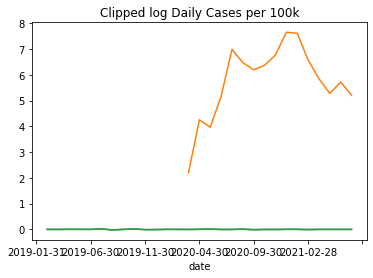

1007.0


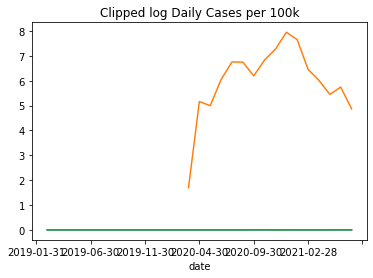

1015.0


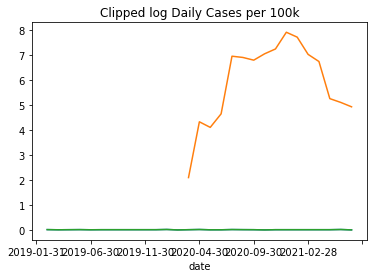

1033.0


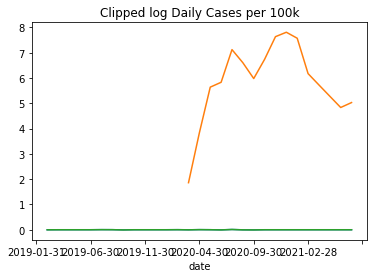

1049.0


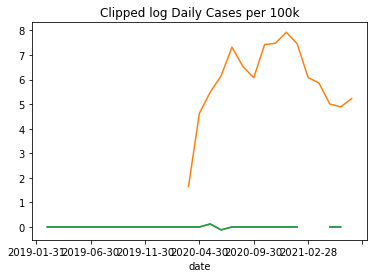

1073.0


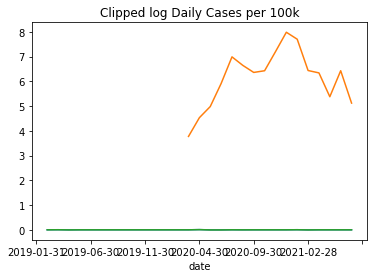

1077.0


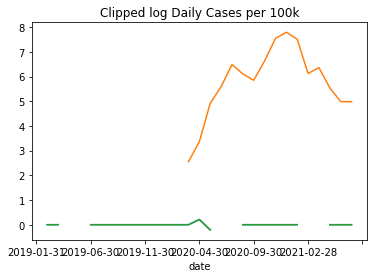

1081.0


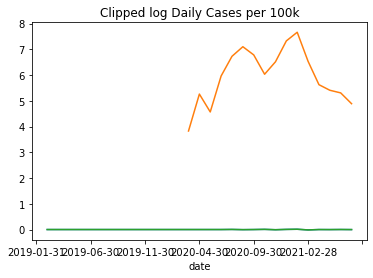

1083.0


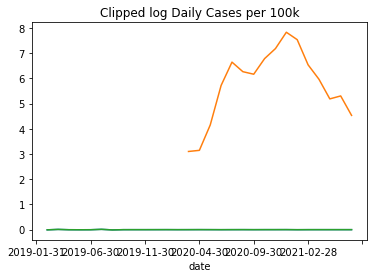

1089.0


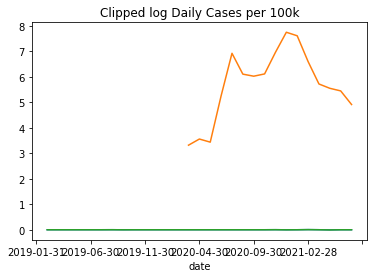

1093.0


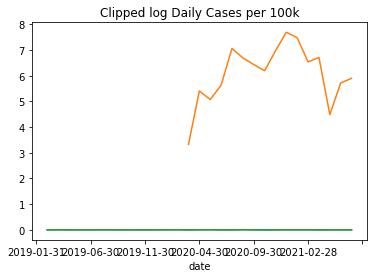

1097.0


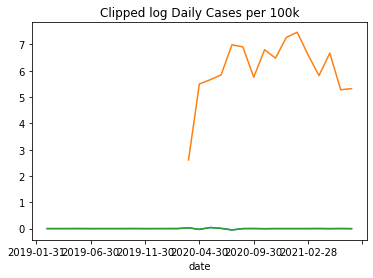

1101.0


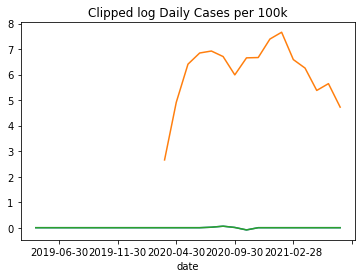

1117.0


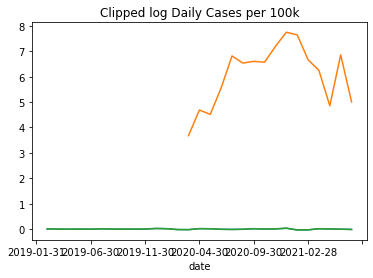

1127.0


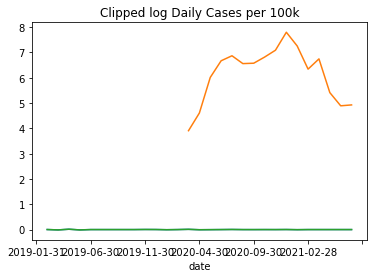

1131.0


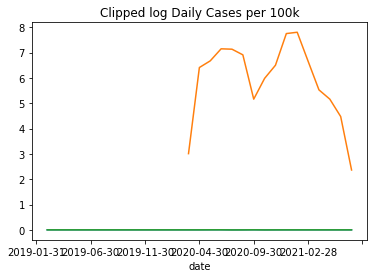

2050.0


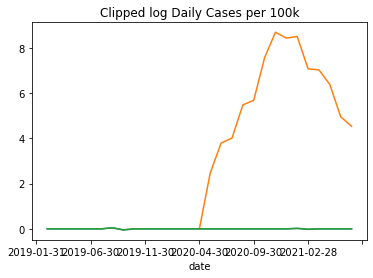

2068.0


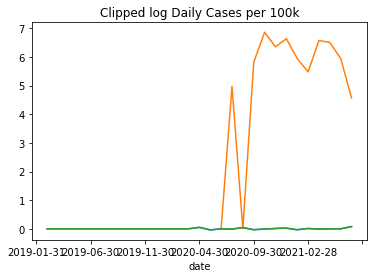

2122.0


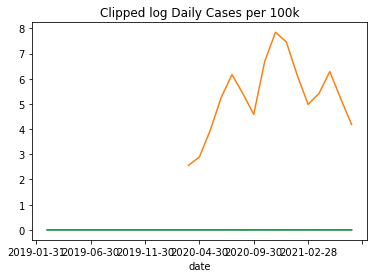

2230.0


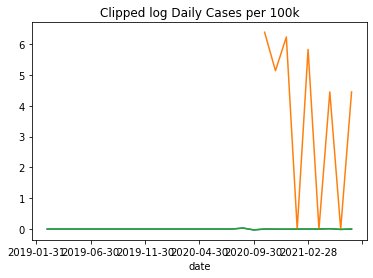

4001.0


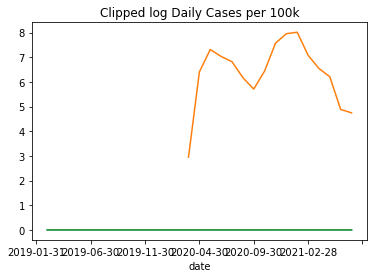

4003.0


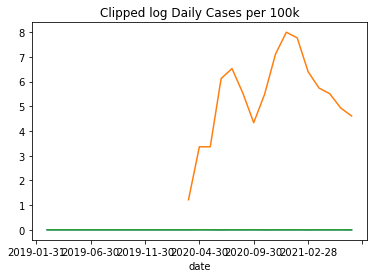

4005.0


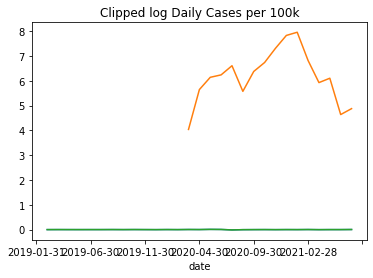

4009.0


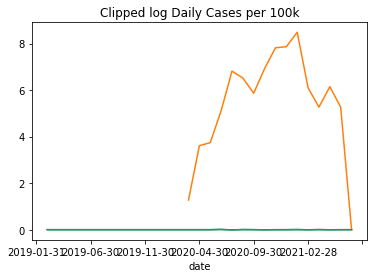

4013.0


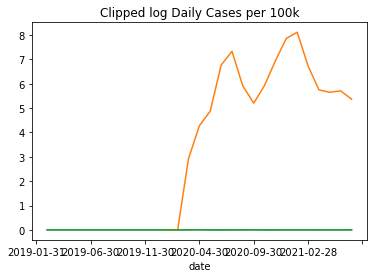

4015.0


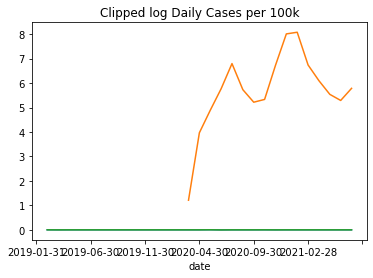

4017.0


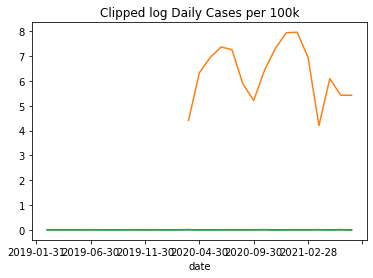

4019.0


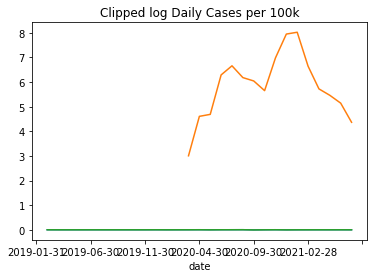

4021.0


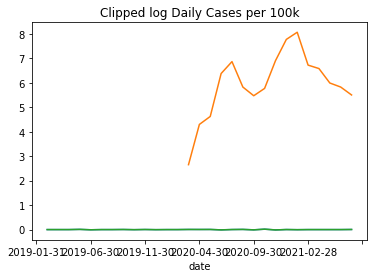

4025.0


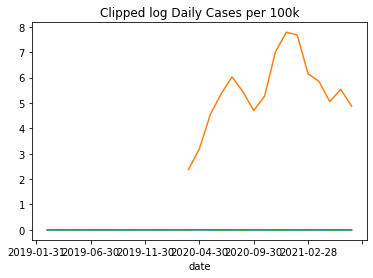

4027.0


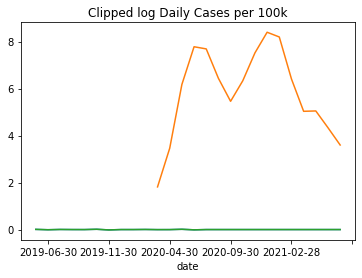

5005.0


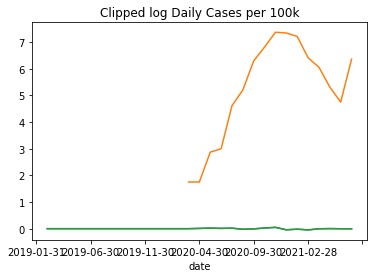

5007.0


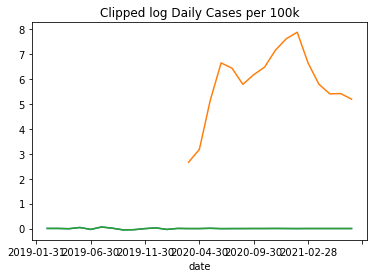

5015.0


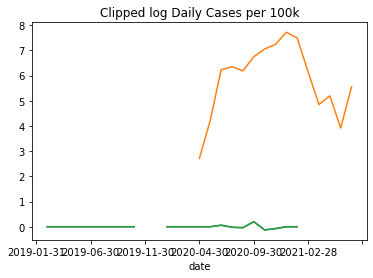

5027.0


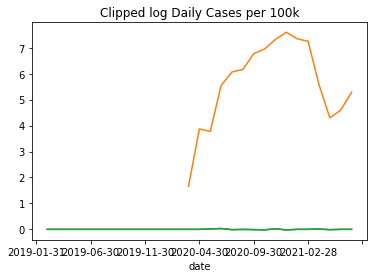

5037.0


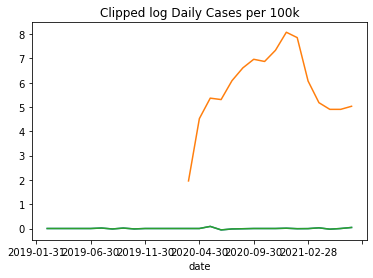

5045.0


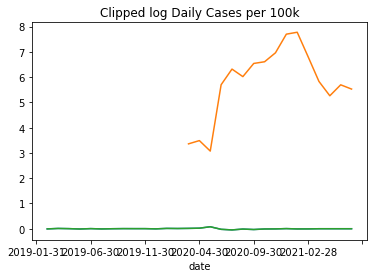

5051.0


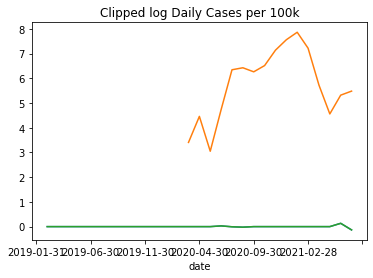

5059.0


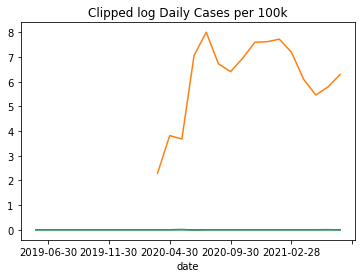

5085.0


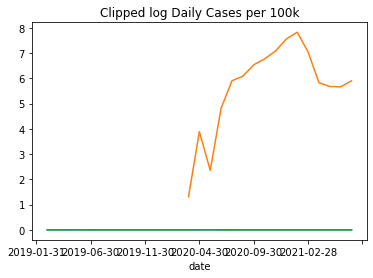

5091.0


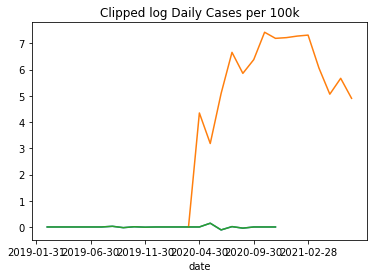

5093.0


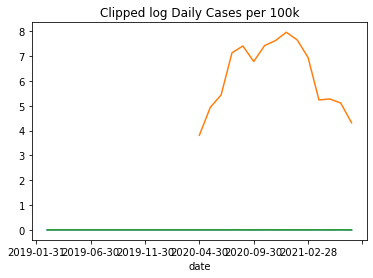

5111.0


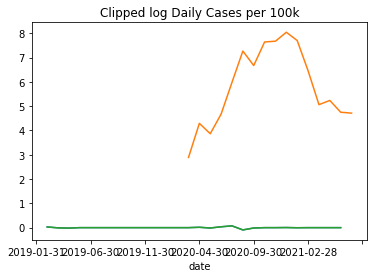

5119.0


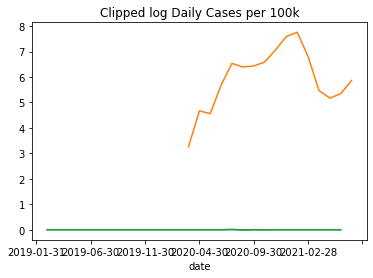

5131.0


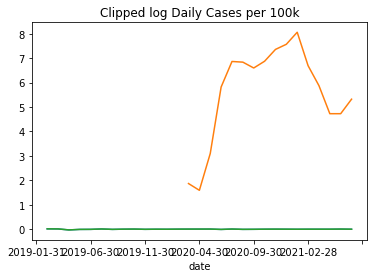

5143.0


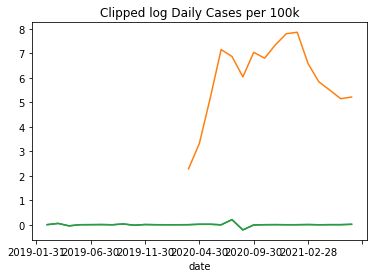

6001.0


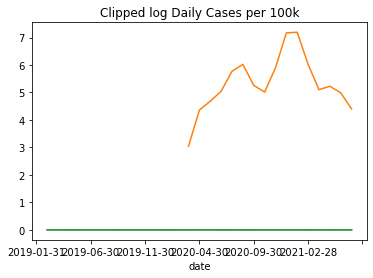

6007.0


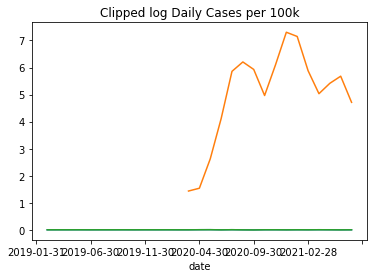

6009.0


KeyboardInterrupt: 

In [117]:
make_some_graphs(FINAL_COUNTY_MONTH)

<AxesSubplot:xlabel='Clipped log Daily Cases per 100k', ylabel='Diffed Log BERT COVID CT Tweets Per Tweet'>

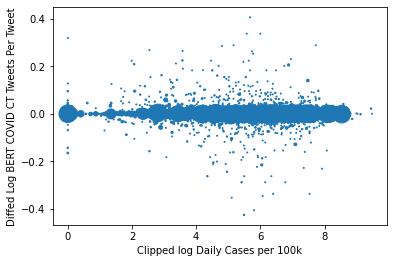

In [91]:
FINAL_COUNTY_MONTH[FINAL_COUNTY_MONTH['year']>2019].plot.scatter(x='Clipped log Daily Cases per 100k', y='Diffed Log BERT COVID CT Tweets Per Tweet', s='Num. Users')

<AxesSubplot:xlabel='Clipped log Daily Cases per 100k', ylabel='Diffed Log CT Tweets Per Tweet'>

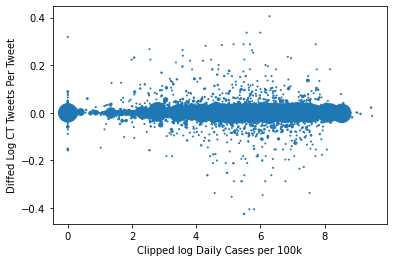

In [147]:
# og leftover from non-bert aggregation
FINAL_COUNTY_MONTH.plot.scatter(x='Clipped log Daily Cases per 100k', y='Diffed Log CT Tweets Per Tweet', s='Num. Users')

In [66]:
print(np.correlate(FINAL_STATE_MONTH.dropna()['Clipped log Daily Cases per 100k'], FINAL_STATE_MONTH.dropna()['Diffed Log CT Tweets Per Tweet']))
print(np.correlate(FINAL_STATE_WEEK.dropna()['Clipped log Daily Cases per 100k'], FINAL_STATE_WEEK.dropna()['Diffed Log CT Tweets Per Tweet']))
print(np.correlate(FINAL_COUNTY_MONTH.dropna()['Clipped log Daily Cases per 100k'], FINAL_COUNTY_MONTH.dropna()['Diffed Log CT Tweets Per Tweet']))
print(np.correlate(FINAL_COUNTY_WEEK.dropna()['Clipped log Daily Cases per 100k'], FINAL_COUNTY_WEEK.dropna()['Diffed Log CT Tweets Per Tweet']))

[-0.61312732]
[-0.83481742]
[-43.00884615]
[-1.47440133]


In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [64]:
FINAL_COUNTY_WEEK['cases'] = FINAL_COUNTY_WEEK['Clipped log Daily Cases per 100k']
FINAL_COUNTY_WEEK['deaths'] = FINAL_COUNTY_WEEK['Clipped log Daily Deaths per 100k']
FINAL_COUNTY_WEEK['ct'] = FINAL_COUNTY_WEEK['Diffed Log BERT COVID CT Tweets Per Tweet']

In [67]:
mod = smf.ols(formula='ct ~ cases + deaths', data=FINAL_COUNTY_WEEK[~FINAL_COUNTY_WEEK['date'].str.contains('2019')])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     ct   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1619
Date:                Wed, 28 Jul 2021   Prob (F-statistic):              0.851
Time:                        21:45:52   Log-Likelihood:             1.1289e+05
No. Observations:               54423   AIC:                        -2.258e+05
Df Residuals:                   54420   BIC:                        -2.258e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      0.484      0.6

In [68]:
pop_mod = smf.wls(formula='ct ~ cases + deaths', data=FINAL_COUNTY_WEEK[~FINAL_COUNTY_WEEK['date'].str.contains('2019')], weights=FINAL_COUNTY_WEEK[~FINAL_COUNTY_WEEK['date'].str.contains('2019')]['POPESTIMATE2019'])
pop_res = pop_mod.fit()
print(pop_res.summary())

                            WLS Regression Results                            
Dep. Variable:                     ct   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4229
Date:                Wed, 28 Jul 2021   Prob (F-statistic):              0.655
Time:                        21:46:20   Log-Likelihood:             1.1577e+05
No. Observations:               54423   AIC:                        -2.315e+05
Df Residuals:                   54420   BIC:                        -2.315e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.000      0.886      0.3

In [69]:
tweet_mod = smf.wls(formula='ct ~ cases + deaths', data=FINAL_COUNTY_WEEK[~FINAL_COUNTY_WEEK['date_x'].str.contains('2019')], weights=FINAL_COUNTY_WEEK[~FINAL_COUNTY_WEEK['date_x'].str.contains('2019')]['Tweet Count'])
tweet_res = tweet_mod.fit()
print(tweet_res.summary())

KeyError: 'date_x'